In [33]:
from google.colab import files
upload = files.upload()

Saving Regressor_sample.csv to Regressor_sample.csv


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [55]:
file_path = 'Regressor_sample.csv'
df = pd.read_csv(file_path)
df.reset_index(inplace=True, drop=True)
df.head()

,category_id,views,comments_disabled,ratings_disabled,channel_text,difference_d,difference_h,published_year,published_month,trending_year,trending_month
0,10,35374613,"""False""","""False""","G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi ...",10.0,243.0,2017,12,2017,12
1,22,502185,"""False""","""False""","The Greatest Tax Bill Ever Sold | December 6, ...",3.0,88.0,2017,12,2017,12
2,10,1006123,"""False""","""False""",Ariana Grande - No Tears Left To Cry (Live Fro...,2.0,51.0,2018,5,2018,5
3,23,891181,"""False""","""False""",Conan Plays Horse With Magic Johnson - CONAN ...,1.0,45.0,2018,3,2018,3
4,25,85244,"""False""","""False""",How ‘Garlic Girls’ Turned South Korea Into a C...,8.0,200.0,2018,2,2018,3


In [56]:
#create the features
X = pd.get_dummies(df.drop(columns='views'))

#create the target
y= df['views']

R-squared: 0.8848846428542053
MSE:  0.7701734616354388
RMSE:  0.3850867308177194


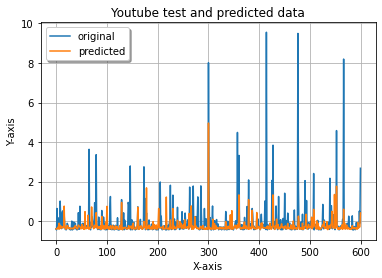

In [60]:
#Test train and split the data for use in BRFR
X= scale(X)
y= scale(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5)

rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)

score = rfr.score(Xtrain, ytrain)
print("R-squared:", score)

ypred = rfr.predict(Xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Youtube test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()